### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2018
---

## Final Project Report

## Project Title: Visual Analytics on Gun Violence in America

## Student(s): Matthew B. Marschall, Raj B. Patel

#### Date: 6/13/18
---

#### Abstract
---
Given data records on instances of gun violence, there are many relationships that can be extrapolated. In this report,  information on gun violence will be given to stakeholders, any resident that wants to gain further insight into the gun violence in the United States, to help improve safety awareness. The data set that has been cleaned and worked on has about 240,000 rows with 29 features. The data set is missing about 11% worth of data, for which cleansing methods have strategically been implemented. Some major findings include that crime has been more prone in the east coast, significantly more males are involved in crimes as compared to women, and that Illinois, California, and Florida are states where many crimes have taken place. 

### 1. Introduction
---

For this project we plan on using the Gun Violence Dataset from Kaggle. Gun violence in America is a highly politicized issue and due to this fact, not much data collection has occurred. This dataset has collected over 260,000 incidents to offer an opportunity to identify trends and hotspots. The objective for this project is to render the datapoints into a more consumable format for the masses and potentially finding patterns to the violence. These patterns can then be used to offer inisght into potential solutions or attention to particular areas that are high in violence. 
The specific objectives will be the folllowing:
- Cleaning dataset:
- Null value replacement techniques
- Removing Duplicate Entries
- Parsing out number of participants per entry
- Creating Subset with Removing entries without Lat & Long data points
- Creating Subset for Gender
- Creating Subset for Age
- Timeline showcasing months and gun violence sums
- Map of gun violence sum count per states
- Word Cloud visualization for sum count per state names - Sumcount wordmap
- Utilize subset lat. & long. points to visually depict the data in a map format showcasing where the incidents occur
- Utilize subset to graph the role of gender in Gun Violence - Bar Chart
- Utilize subset to graph the role of age in Gun Violence - Bin and Histogram

### 2. Problem Definition
---

The problem of gun violence in the United States is one of the most heavily debated topics. With such emotional incidents, it is vital to look at data to garner a better understanding of the issue. Utilizing this dataset to address the problem to identify the relationships that may exist among the features and provide further insight into gun violence. 
The stakeholders for this problem would be any resident that wants to gain further insight into the gun violence in the United States.
This problem stems from acts of human violence.
Since this problem affects most of the residents of the United States, all residents stand to benefit from the insights.

### 3. Data Sources
---

The gun violence dataset was obtained from Kaggle.com. This particular dataset was provided by James Ko and is in CSV format. The datapoints collected into the CSV were obtained from gunviolencearchive.org. Since gunviolencearchive.org limits its query system and exporting to csv method was missing crucial attributes. The dataset author created a webscraper to efficently compile the dataset. The following are the steps performed:

 Stage 1: For each date between 1/1/2013 and 3/31/2018, a Python script queried all incidents that happened at that particular date, then scraped the data and wrote it to a CSV file. Each month got its own CSV file, with the exception of 2013, since not many incidents were recorded from then.

Stage 2: Each entry was augmented with additional data not directly viewable from the query results page, such as participant information, geolocation data, etc.

Stage 3: The entries were sorted in order of increasing date, then merged into a single CSV file

James Ko - https://www.kaggle.com/jameslko/gun-violence-data 

### 4. Acquiring and Loading Data
---

In [4]:
#Import necessary libraries
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 5
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from mpl_toolkits.basemap import Basemap
from PIL import Image
from wordcloud import WordCloud

In [5]:
#read in data with pandas
data = pd.read_csv("./DataSets/gun_violence.csv")

### 5. Exploring and Visualizing Data
---

In [6]:
#rows x columns
data.shape

(239677, 29)

In [7]:
#checking out the col names
data.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [8]:
#refining the dataset to applicable cols
data = data[["date", "state", "city_or_county", "n_killed", "n_injured", "congressional_district",
             "latitude","longitude", "n_guns_involved", "participant_age", "participant_age_group", 
             "participant_gender", "state_house_district", "state_senate_district"]]

In [9]:
#List the number of missing values for each column.
#Iterate through each column vector to find the # of missing values
for row in data:
    value = data[row].isnull().sum()
    print("There are", value, " missing values in column",row)

There are 0  missing values in column date
There are 0  missing values in column state
There are 0  missing values in column city_or_county
There are 0  missing values in column n_killed
There are 0  missing values in column n_injured
There are 11944  missing values in column congressional_district
There are 7923  missing values in column latitude
There are 7923  missing values in column longitude
There are 99451  missing values in column n_guns_involved
There are 92298  missing values in column participant_age
There are 42119  missing values in column participant_age_group
There are 36362  missing values in column participant_gender
There are 38772  missing values in column state_house_district
There are 32335  missing values in column state_senate_district


In [10]:
#percentage of data missing
missing_values = 100 *(data.isnull().sum().sum() / (data.shape[0]*data.shape[1]))
print(missing_values,"% of the data is missing.")

11.000727765164903 % of the data is missing.


In [11]:
#checking out dataframe
data.head()

,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,state_house_district,state_senate_district
0,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,40.3467,-79.8559,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,NaN
1,2013-01-01,California,Hawthorne,1,3,43.0,33.9090,-118.3330,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,62.0,35.0
2,2013-01-01,Ohio,Lorain,1,3,9.0,41.4455,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,56.0,13.0
3,2013-01-05,Colorado,Aurora,4,0,6.0,39.6518,-104.8020,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,40.0,28.0
4,2013-01-07,North Carolina,Greensboro,2,2,6.0,36.1140,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,62.0,27.0


### 6. Wrangling and Cleansing Data
---

In [12]:
#start cleaning refined dataset by removing duplicates
data.drop_duplicates(keep=False)

,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,state_house_district,state_senate_district
0,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,40.3467,-79.8559,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,NaN
1,2013-01-01,California,Hawthorne,1,3,43.0,33.9090,-118.3330,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,62.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239675,2018-03-31,Texas,Houston,1,0,9.0,29.7201,-95.6110,1.0,0::42,0::Adult 18+,0::Male,149.0,17.0
239676,2018-03-31,Maine,Norridgewock,2,0,2.0,44.7293,-69.7691,2.0,0::58||1::62,0::Adult 18+||1::Adult 18+,0::Female||1::Male,111.0,3.0


In [13]:
#drop rows with missing coordinates
data.dropna(subset=['latitude', 'longitude'], axis = 0, inplace = True)

In [14]:
#fill congressional district missing values with mode of the column 
data["congressional_district"] = data["congressional_district"].fillna(data["congressional_district"].mode()[0])

In [15]:
#fill n_guns_involved missing values with mean of the column 
data["n_guns_involved"] = data["n_guns_involved"].fillna(data["n_guns_involved"].mean())

In [16]:
#fill state_house_district missing values with mode of the column 
data["state_house_district"] = data["state_house_district"].fillna(data["state_house_district"].mode()[0])

In [17]:
#forward fill missing values for participant_age column
data["participant_age"] = data["participant_age"].fillna(method = 'ffill')

In [18]:
#forward fill missing values for participant_age_group column
data["participant_age_group"] = data["participant_age_group"].fillna(method = 'ffill')

In [19]:
#forward fill missing values for participant_gender column
data["participant_gender"] = data["participant_gender"].fillna(method = 'ffill')

In [20]:
#forward fill missing values for state_senate_district column
data["state_senate_district"] = data["state_senate_district"].fillna(data["state_senate_district"].mode()[0])

In [21]:
#Check to see if the coordinates coloumns have any missing values
for row in data:
    value = data[row].isnull().sum()
    print("There are", value, " missing values in column",row)

There are 0  missing values in column date
There are 0  missing values in column state
There are 0  missing values in column city_or_county
There are 0  missing values in column n_killed
There are 0  missing values in column n_injured
There are 0  missing values in column congressional_district
There are 0  missing values in column latitude
There are 0  missing values in column longitude
There are 0  missing values in column n_guns_involved
There are 0  missing values in column participant_age
There are 0  missing values in column participant_age_group
There are 0  missing values in column participant_gender
There are 0  missing values in column state_house_district
There are 0  missing values in column state_senate_district


In [22]:
#reindex after fixing null and dropping duplicates
data.index = pd.RangeIndex(len(data.index))

In [23]:
#create a function to parse columns
def clean(a):
    #define what to split on and what to replace
    a = a.split('||')
    a  = [x.replace('::','-') for x in a]
    a =  [(x.split('-')) for x in a]
    #create an empty array
    y = []
    #add the clean data into the array
    for  i in range (0, len(a)):
        y.append(a[i][-1])
    return(y)  
#create a lambda function for cleaning
change = lambda x: clean(x)

#apply the clean function
data['participant_gender'] = data['participant_gender'].apply(change)
data['participant_age'] = data['participant_age'].apply(change)
data['participant_age_group'] = data['participant_age_group'].apply(change)

In [24]:
#checking to see if nan filled or removed
data.head()

,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,state_house_district,state_senate_district
0,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,40.3467,-79.8559,1.378724,[20],"[Adult 18+, Adult 18+, Adult 18+, Adult 18+, A...","[Male, Male, Male, Female]",18.0,5.0
1,2013-01-01,California,Hawthorne,1,3,43.0,33.9090,-118.3330,1.378724,[20],"[Adult 18+, Adult 18+, Adult 18+, Adult 18+]",[Male],62.0,35.0
2,2013-01-01,Ohio,Lorain,1,3,9.0,41.4455,-82.1377,2.000000,"[25, 31, 33, 34, 33]","[Adult 18+, Adult 18+, Adult 18+, Adult 18+, A...","[Male, Male, Male, Male, Male]",56.0,13.0
3,2013-01-05,Colorado,Aurora,4,0,6.0,39.6518,-104.8020,1.378724,"[29, 33, 56, 33]","[Adult 18+, Adult 18+, Adult 18+, Adult 18+]","[Female, Male, Male, Male]",40.0,28.0
4,2013-01-07,North Carolina,Greensboro,2,2,6.0,36.1140,-79.9569,2.000000,"[18, 46, 14, 47]","[Adult 18+, Adult 18+, 17, Adult 18+]","[Female, Male, Male, Female]",62.0,27.0


### 7. Analyzing Data
---


C:\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.

C:\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.



<function matplotlib.pyplot.show(*args, **kw)>

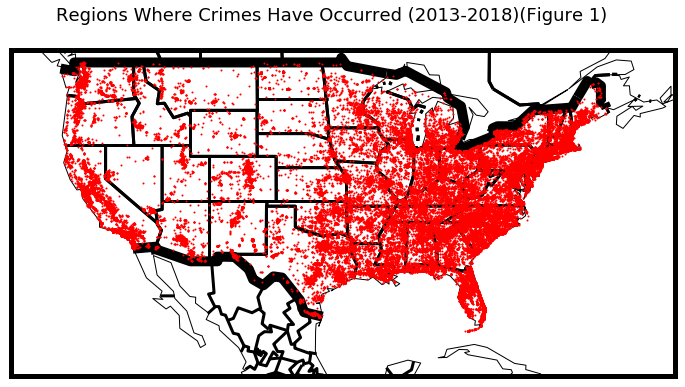

In [25]:
#Figure 1
#plot of all incidents via lat/long
#fill in empty lists with coordinates
lon=[]  
lat=[]  
for x in data['longitude']: lon.append(x)  
for x in data['latitude']: lat.append(x)

#set plot size    
plt.figure(figsize=(12,6))

#define plot title
plt.suptitle('Regions Where Crimes Have Occurred (2013-2018)(Figure 1)', fontsize=18)


#configure U.S. map
map = Basemap(projection = 'mill', llcrnrlat = 20, urcrnrlat = 50,
            llcrnrlon = -130, urcrnrlon = -60,resolution = 'c')
map.drawcoastlines()
map.drawcountries(linewidth = 10)
map.drawmapboundary(linewidth = 5)
map.drawstates(linewidth=3)

#set map type
map.etopo()

#switch coordinates
x,y = map(lon, lat)
map.plot(x, y, 'ro', markersize=1) 

plt.show

In [26]:
#new column to showcase number of people involved
data["n_involved"] = data['participant_age'].str.len()

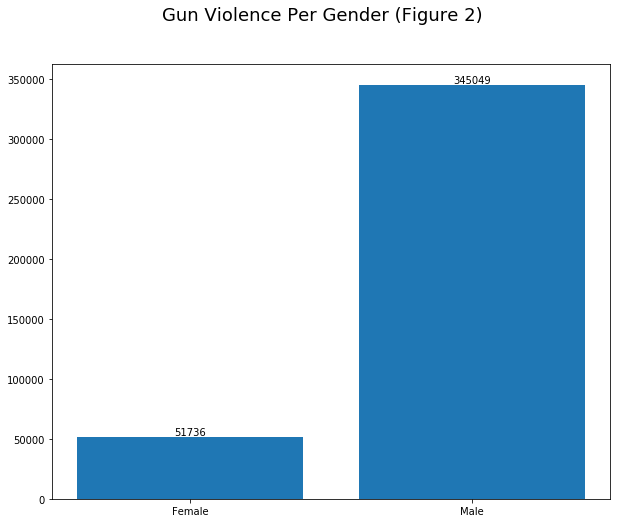

In [27]:
#Figure 2
#plot for gun violence and gender
gender = data["participant_gender"]
males = 0
females = 0
for x in gender:
    for y in x:
        if y == "Male":
            males +=1
        else: 
            females +=1

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Gun Violence Per Gender (Figure 2)', fontsize=18)
xAxis = ['Female', 'Male']
yAxis = [females, males]
ax = fig.gca()  #get current axes
ax.bar(xAxis, yAxis, align='center')
rects = ax.patches

labels = [females, males]

#loop to have frequency counts for each column
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

In [28]:
#converting date into pd date object
data['date']=pd.to_datetime(data['date'])

In [29]:
#Example Row with new Date format
data[0:1]

,date,state,city_or_county,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,state_house_district,state_senate_district,n_involved
0,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,40.3467,-79.8559,1.378724,[20],"[Adult 18+, Adult 18+, Adult 18+, Adult 18+, A...","[Male, Male, Male, Female]",18.0,5.0,1


In [30]:
#Example month output
data["date"].dt.month[1]

1

In [31]:
#Dict for Month sum violence values
monthSum = dict(data.date.dt.month.value_counts())
monthSum

{1: 22879,
 3: 21296,
 7: 20886,
 8: 20376,
 5: 19795,
 6: 18601,
 4: 18484,
 9: 18478,
 10: 18474,
 2: 18460,
 12: 17305,
 11: 16720}

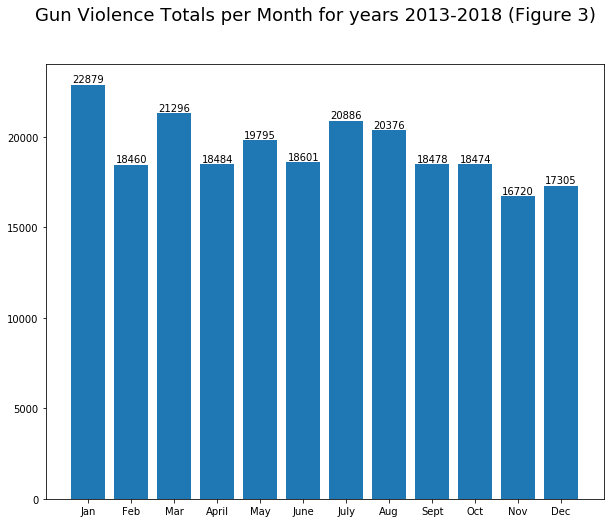

In [32]:
#figure 3
#year timeline plot showcasing sums per month
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Gun Violence Totals per Month for years 2013-2018 (Figure 3)', fontsize=18)
labels = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
xAxis = monthSum.keys()
yAxis = monthSum.values()
ax = fig.gca()  #get current axes
ax.bar(xAxis, yAxis, align='center')
#Remove the default x-axis tick numbers and  
#use tick numbers of your own choosing:
ax.set_xticks(np.asarray([i for i in range(1, len(monthSum)+1)]))
#Replace the tick numbers with strings:
ax.set_xticklabels(labels)
rects = ax.patches

#loop to have frequency counts for each column
for rect, label in zip(rects, yAxis):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=10)

In [36]:
#Dict of state names per sums
stateSum = dict(data.state.value_counts())

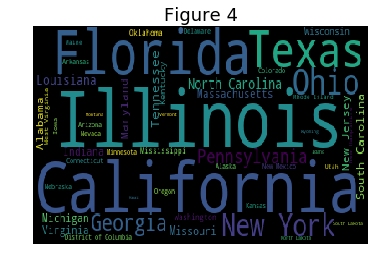

In [37]:
#Figure 4
#Ploting Sum per state in a wordcloud
word_cloud = WordCloud().generate_from_frequencies(stateSum)

# Display the generated image:
plt.imshow(word_cloud, interpolation='nearest', aspect='auto')
plt.title('Figure 4', fontsize=18)
plt.axis("off")
plt.show()

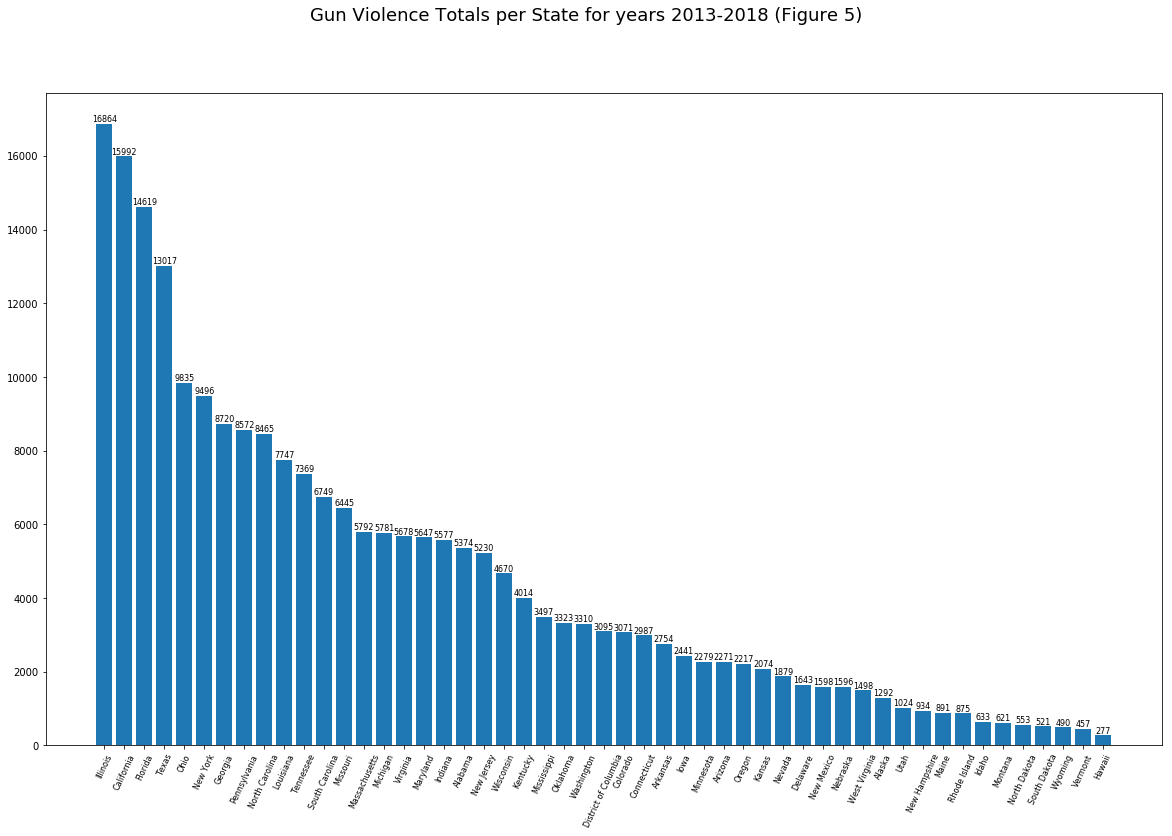

In [38]:
#Figure 5
#plot of gun violence totals per state for entire dataset
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Gun Violence Totals per State for years 2013-2018 (Figure 5)', fontsize=18)
labels = stateSum.keys()
xAxis = stateSum.keys()
yAxis = stateSum.values()
ax = fig.gca()  #get current axes
ax.bar(xAxis, yAxis, align='center')
#Replace the tick numbers with strings:
ax.set_xticklabels(labels, rotation = 65, fontsize = 8)
rects = ax.patches

#loop to have frequency counts for each column
for rect, label in zip(rects, yAxis):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=8)

In [39]:
#Example of age entry in DF
data.participant_age[231753]

['58', '62']

In [40]:
#Example of 2nd element in age col in list format in DF
data.participant_age[231753][1]

'62'

In [41]:
#loop to parse out all ages
ages = []
for i in range(0,len(data)):
    for j in range(0, len(data.participant_age[i])):
        ages.append(data.participant_age[i][j])    
ages[1]

'20'

In [42]:
#Cutting Ages into bins and labels
labels = ["Minor", "Young Adult", "Adult", "Middle Age", "Senior", "Elderly"]
bins = [0, 18, 25, 35, 55, 75, 110]
cat = pd.cut(ages, bins, labels=labels)
cat

[Young Adult, Young Adult, Young Adult, Adult, Adult, ..., Young Adult, Young Adult, Middle Age, Senior, NaN]
Length: 344541
Categories (6, object): [Minor < Young Adult < Adult < Middle Age < Senior < Elderly]

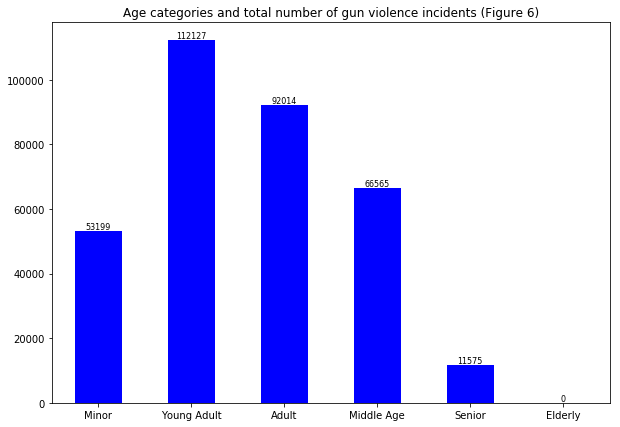

In [43]:
#Figure 6
#plt of age groups to violence counts
ax = cat.value_counts().plot.bar(rot=0, color="b", figsize=(10,7), title="Age categories and total number of gun violence incidents (Figure 6)")
rects = ax.patches

#loop to have frequency counts for each column
for rect, label in zip(rects, cat.value_counts()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=8)
plt.show()

### 8. Reporting Results
---

### Figure 1:
For Figure 1 we utilized the latitude and longitude datapoints over the US Map to showcase where all the incidents have occurred. After plotting all the incidents and looking at the graph you can notice several hotspots for violent activity. The first hotspot would be the entire eastern US. The entire eastern seaboard is covered in incidents and  this extends westward just past the Mississippi River. The exception would be the hotspot around the Great Lakes. This cluster extends outward from the city of Chicago and has the highest individual count of violence in the country. Westward from the Mississippi River you notice less density of incidents until you reach the west coast. Again, sadly the west coast in particular California have a high number of incidents depicted. Looking at the map and having a general understanding of the population density of the US; you can notice that the number of incidents reflects the large population centers of the US.  

### Figure 2:
For Figure 2 we created a subset of gender to showcase what role gender plays in gun violence. As you can see the total number of individuals is 396,785 in the dataset. The graph gives a great visualization dipicting that of the total amount only 13% of individuals involved were women. Men were approximately 7.7 times more likely to be involved in gun violence than women.

### Figure 3:
It is important to note for figure 3 that the dataset only contains partial years for 2013 and 2018. That being said it does give a good approximation of what the true values are since the 2nd half of 2013 was included and the 1st half of 2018. This bar graph does a great job working as a timeline to showcase the months and violence totals attributed to those months. From this graph you can visually see that for the most part no month is signifcant more violent than the rest. Sadly, there is around a constant amount of gun violence through out the year. It also shows that January is the month with the highest amount of violence and November is the month with the least amount of violence.

### Figure 4:
Figure 4 was created to visualize the data in a new easily consumable format. We felt the word cloud format would be perfect to showcase which states are more prone to gun violence. As any American knows, Chicago is in the state of Illinois and has the highest number of incidents of gun violence and murders. This word cloud showcases that fact and interstingly compared to Figure 1 where you would presume the 2nd highest indicent level to be somewhere on the east coast. It shows you that the next is California and then Florida. This was a great way to instantly compare states with gun violence without the reader needing to consume numerical data.

### Figure 5:
Figure 5 utilizes the same selected data as Figure 4 but we wanted to display it in a format that would also showcase the total number of incidents per state. We felt this was an important way to utilize the data as most Gun Violence per State statistics are done per capita. Per capita is a great way to show the percentage to the population but does not truly show the high number of incidents. The graph shows that Illinois followed by California then Florida have the highest number of incidents and Hawaii having the lowest. 

### Figure 6:
For Figure 6 we parsed out all the ages for all the people who commited gun violence. We then used bins to categorize different age groups. From this visualization you can clearly see that most acts of gun violence are commited by individuals under the age of 35 (end cap for Adult category). Further more you can see that the age group with the highest number of the incidents were done by Young Adults (18-25). Lastly, it showcases the suprisingly high number of gun violence incidents commited by minors (age < 18).

### 9. Conclusion
---

After cleaning the data, visualizations have been created on top of the processed data. We found that crime is more prominent on the coasts of America. The middle country land does not have much crime, as the population of that region is relatively low. The east coast has more crime than the west coast. This makes sense because the eastern region has a higher population count than that of the west coast. Also, a considerably larger amount of males have been involved with crime as compared to females.  The female to male ratio is about 1:15. Regarding the timing of the crimes in months, the data is spread, for the most part, evenly. It should be noted that not all months have even representation because the data set has data collected from the middle of 2013 to the current year, 2018, which has not ended yet. From a frequency standpoint, California, Illinois, and Florida are the three states with the most amount of gun violence records. In addition, the largest group of participant include young adults who are less than 18. Some challenges include combining a heat map over a geospatial plot, and finding the best method to work with missing data, as approaches to this can vary. Some future work can include creating interactive geospatial plots and a model to identify the severity of crime given some pieces of information such as gender, number of people involved, and age. Upon completion of the project, we learned how to create word clouds, interpret missing data, reindex data after cleansing, and combine data in a suitable format for visualization. 

### 10. References

### Datasource: https://www.kaggle.com/jameslko/gun-violence-data

### Help: https://stackoverflow.com